## **Adam Optimization Algorithm** 
--- 
- Adam is an Optimization Algorithm and stands for **Adaptive Moment Estimation**.
- It computes adaptive learning rates for different parameters.
- It customizes each parameter's learning rate based on its gradient history, and this adjustment helps the neural network learn efficiently as a whole.
---
### **Standard Gradient Descent** 
The standard gradient descent update rule is given by, 
$$
\theta_{t+1} = \theta_t - \alpha \nabla J(\theta_t)
$$
- Here, $ \theta_{t+1} $ represents Model Parameters
- $ \alpha $ represents Learning rate
- $ \nabla J(\theta_t) $ represents Gradient of the cost function with the parameters. 

- In a standard, GD algorithm, the learning rate $\alpha$ is fixed.
- Choosing a small learning rate ensures convergence but makes training slow.
- A large learning rate may cause divergence. Also, it might miss the minima.
- Slow Adaptation: Gradient descent does not adapt its learning rate dynamically based on past gradients.
---
### **Adam** 
- Adam solves issues with Gradient Descent by incorporating
  1. Momentum (First Moment Estimate) - Helps smooth gradients
  2. RMSProp (Second Moment Estimate) - Scales learning rates based on past squared gradients.
  3. Bias Correction - Corrects for initialization bias in the first few steps.
---
#### **How Adam Works?**
- **Initialization:**
- Adam sets up two things to keep track of how the network is doing.
  1. One is for the average (mean) of how steep the slope is when its figuring out how to improve (this is called the first moment).
  2. The other is for the average of how fast the slope is changing. (this is called the second moment)
- **Look at the slope:**
- During training, Adam checks how steep the slope is by looking at how the network's guesses compare to the correct answers.
- **Update the First Moment:**
- Adam then figures out the average slope over time. It's like remembering how steep the hill has been in the past.
- **Update the Second Moment:**
- Adam also figures out the average of how fast the slope is changing over time. This helps to understand if the slope is getting steeper or gentler.
- **Correct the Bias:**
- At the beginning since the averages start at zero, they might not be very accuracte. So, Adam makes some adustments to make them more accurate.
- **Adjust the Parameters:**
- Finally, Adam uses these averages to help adjust the network’s settings a bit. It’s like gently nudging the network in the right direction to improve its performance.
---
### **Derivation of Adam Optimization Algorithm** 
  1. Compute Gradients
     At each time step t, compute the gradient of loss function:
     $$ g_t = \nabla J(\theta_t) $$
  2. First Moment Estimate (Momentum Term)
     The first moment estimate is an exponentially decaying average of past gradients.
     $$ m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t $$
     
- \( m_t \) approximates the mean of gradients.  
- \( \beta_1 \) is the momentum parameter (typically 0.9).  
- \( g_t \) is the current gradient.

  3. Second Moment Estimate (Variance Term)
     The second moment estimate is an exponentially decaying average of squared gradients:
     $$ v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 $$
 

- \( v_t \)estimates the uncentered variance of gradients.  
- $ \beta_2 $ is typically set to 0.999.  

  4. Bias Correction
     Since \( m_t \) and \( v_t \) are initialized as zero, they are biased towards zero in early iterations. Bias-corrected estimates are:

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$
  5. Parameter Update Rule 
  The Adam updat equation is: 
  $$
\theta_{t+1} = \theta_t - \frac{\alpha \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

- $ \alpha $ is the learning rate.  
- $ \epsilon $ is a small constant (e.g., \( 10^{-8} \)) for numerical stability.  


## Using Adam in Pytorch 

In [5]:
import torch 
import torch.nn as nn 
import torch.optim as optim 

In [6]:
# Define your model 
model = nn.Sequential(
    nn.Linear(10, 50), 
    nn.ReLU(), 
    nn.Linear(50, 1)
)

In [ ]:
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
# Training loop
for epoch in range(num_epochs):
   for batch in dataloader:
       # Zero the gradients
       optimizer.zero_grad()
      
       # Forward pass
       outputs = model(batch)
       loss = criterion(outputs, targets)
      
       # Backward pass
       loss.backward()
      
       # Update weights
       optimizer.step()
# Adjusting learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
for epoch in range(num_epochs):
   train(...)
   scheduler.step()

### Let's Visualize the Training Loss for different Optimizers 

In [9]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [20]:
# Load the MNIST dataset 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
# A simple NN 
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


optimizers = {
    "AdaGrad": optim.Adagrad,
    "RMSProp": optim.RMSprop,
    "SGDNesterov": lambda params: optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True),
    "AdaDelta": optim.Adadelta,
    "Adam": optim.Adam
}

# Train model with each optimizer and record training loss
losses = {}
criterion = nn.CrossEntropyLoss()
epochs = 10 

for name, opt_fn in optimizers.items():
    model = SimpleNN().to(device)
    optimizer = opt_fn(model.parameters())
    epoch_losses = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_losses.append(running_loss / len(trainloader))
        print(f"{name} - Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}")
    
    losses[name] = epoch_losses




AdaGrad - Epoch 1, Loss: 0.4739
AdaGrad - Epoch 2, Loss: 0.3090
AdaGrad - Epoch 3, Loss: 0.2694
AdaGrad - Epoch 4, Loss: 0.2493
AdaGrad - Epoch 5, Loss: 0.2326
AdaGrad - Epoch 6, Loss: 0.2190
AdaGrad - Epoch 7, Loss: 0.2118
AdaGrad - Epoch 8, Loss: 0.2030
AdaGrad - Epoch 9, Loss: 0.1967
AdaGrad - Epoch 10, Loss: 0.1915
RMSProp - Epoch 1, Loss: 1.2524
RMSProp - Epoch 2, Loss: 0.5592
RMSProp - Epoch 3, Loss: 0.5107
RMSProp - Epoch 4, Loss: 0.4938
RMSProp - Epoch 5, Loss: 0.4769
RMSProp - Epoch 6, Loss: 0.4612
RMSProp - Epoch 7, Loss: 0.4570
RMSProp - Epoch 8, Loss: 0.4512
RMSProp - Epoch 9, Loss: 0.4557
RMSProp - Epoch 10, Loss: 0.4404
SGDNesterov - Epoch 1, Loss: 0.3956
SGDNesterov - Epoch 2, Loss: 0.2108
SGDNesterov - Epoch 3, Loss: 0.1651
SGDNesterov - Epoch 4, Loss: 0.1425
SGDNesterov - Epoch 5, Loss: 0.1228
SGDNesterov - Epoch 6, Loss: 0.1139
SGDNesterov - Epoch 7, Loss: 0.1049
SGDNesterov - Epoch 8, Loss: 0.0967
SGDNesterov - Epoch 9, Loss: 0.0904
SGDNesterov - Epoch 10, Loss: 0.08

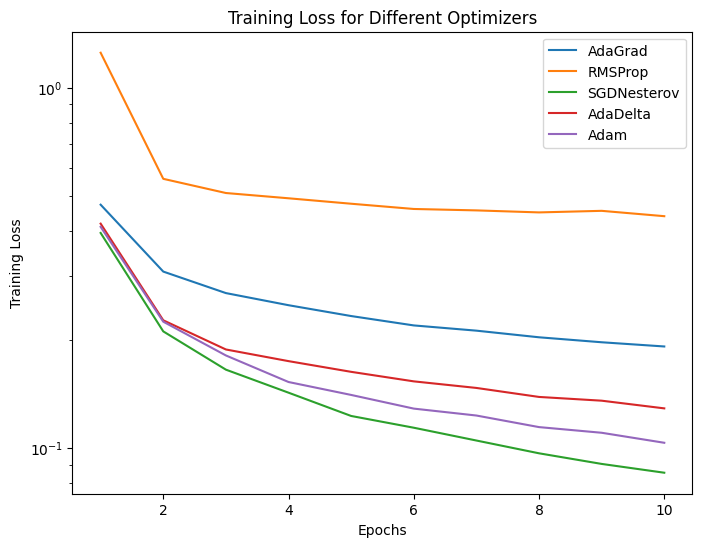

In [23]:
# Plot the losses 
plt.figure(figsize=(8, 6))
for name, loss_values in losses.items():
    plt.plot(range(1, epochs + 1), loss_values, label=name)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.yscale('log')
plt.legend()
plt.title("Training Loss for Different Optimizers")
plt.show()

### Takeaway: 

- Like we can see Adam shows one of the lowest training losses across epochs.
- It converges faster, and maintains a consistently low loss, which makes it efficient.  